SciPy - Scientific Python

Created by NumPy's creator Travis Olliphant and provides more utility functions for optimization, stats and signal processing.

In [1]:
# Mode value from a list

from scipy import stats

speed = [99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86]

mode, count = stats.mode(speed)
print(f"Speed: {', '.join(map(str, speed))}")
print(f"Mode: {mode}, count: {count}")

Speed: 99, 86, 87, 88, 111, 86, 103, 87, 94, 78, 77, 85, 86
Mode: 86, count: 3


In [2]:
# Solve example linear equations

import numpy as np
from scipy import linalg

a = np.array([[1, 2, -3], [2, -5, 4], [5, 4, -1]])
b = np.array([-3, 13, 5])
result = linalg.solve(a, b)

for num, equation in enumerate(a):
    print(f"{equation[0]}x + {equation[1]}y + {equation[2]}z = {b[num]}")

print("Results:")
print(f"x={result[0]:.2f}")
print(f"y={result[1]:.2f}")
print(f"c={result[2]:.2f}")

1x + 2y + -3z = -3
2x + -5y + 4z = 13
5x + 4y + -1z = 5
Results:
x=2.00
y=-1.00
c=1.00


In [3]:
# Numerical integration of a continuous function

from scipy import integrate

f = lambda x: 0.75 * x**2
range_min = -5
range_max = 30

result, error = integrate.quad(f, range_min, range_max)
print(f"Adaptive quadrature integration result: {result}")
print(f"Error estimate: {error}\n")

Adaptive quadrature integration result: 6781.25
Error estimate: 7.528699885739343e-11



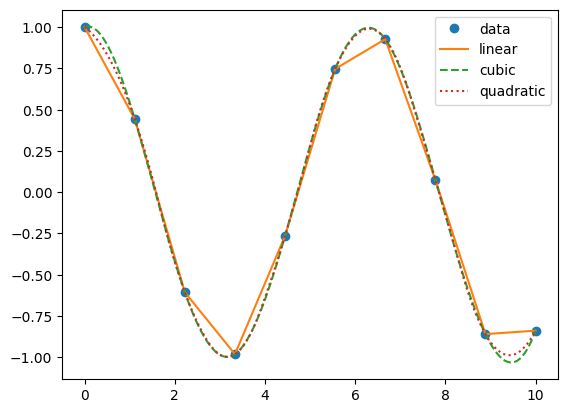

In [4]:
# Example interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

x = np.linspace(0, 10, 10)
y = np.cos(x)

xnew = np.linspace(0, 10, 1000)
fun1 = interpolate.interp1d(x, y, kind="linear")
fun2 = interpolate.interp1d(x, y, kind="cubic")
fun3 = interpolate.interp1d(x, y, kind="quadratic")

plt.plot(
    x,
    y,
    "o",
    xnew,
    fun1(xnew),
    "-",
    xnew,
    fun2(xnew),
    "--",
    xnew,
    fun3(xnew),
    ":",
)
plt.legend(["data", "linear", "cubic", "quadratic"], loc="best")
plt.show()

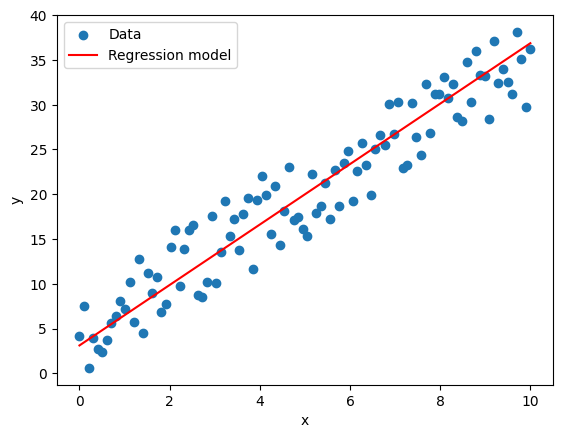

In [5]:
# Orthogonal distance regression

import numpy as np
from scipy import odr
import matplotlib.pyplot as plt

np.random.seed(1)

N = 100
x = np.linspace(0, 10, N)
y = 3 * x + 10 * np.random.random(N)
sx = np.random.random(N)
sy = np.random.random(N)

f = lambda model_coefficients, x: model_coefficients[0] * x + model_coefficients[1]
linear_model = odr.Model(f)
data_set = odr.RealData(x, y, sx=sx, sy=sy)
regression_analysis = odr.ODR(data_set, linear_model, beta0=[1.0, 2.0])
regression_result = regression_analysis.run()

x_fit = np.linspace(0, 10, 100)
y_fit = regression_result.beta[0] * x_fit + regression_result.beta[1]

plt.scatter(x, y, label="Data")
plt.plot(x_fit, y_fit, "r", label="Regression model")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

[[2.25882259 2.02459573]
 [0.00396557 0.03360817]
 [0.38864137 2.03577746]]


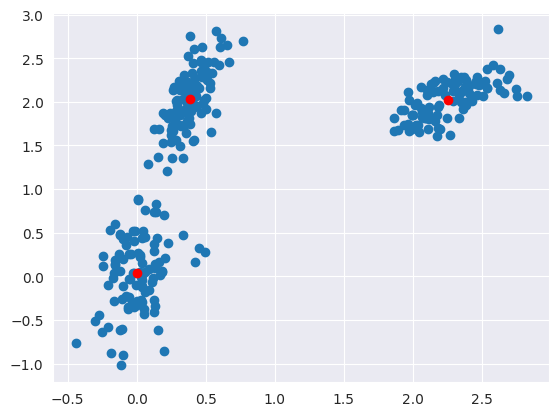

In [6]:
# K-means clustering algorithm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.vq import kmeans, whiten

points = 100
a = np.random.multivariate_normal(
    [0, 0],
    [[4, 1], [1, 4]],
    size=points,
)
b = np.random.multivariate_normal(
    [30, 10],
    [[10, 2], [2, 1]],
    size=points,
)
c = np.random.multivariate_normal(
    [5, 10],
    [[3, 2], [2, 3]],
    size=points,
)

sum_of_points = np.concatenate((a, b, c))
whitened_points = whiten(sum_of_points)
cluster_centers, _ = kmeans(whitened_points, 3)

print(cluster_centers)
sns.set_style("darkgrid")
plt.scatter(whitened_points[:, 0], whitened_points[:, 1])
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    color="r",
)
plt.show()

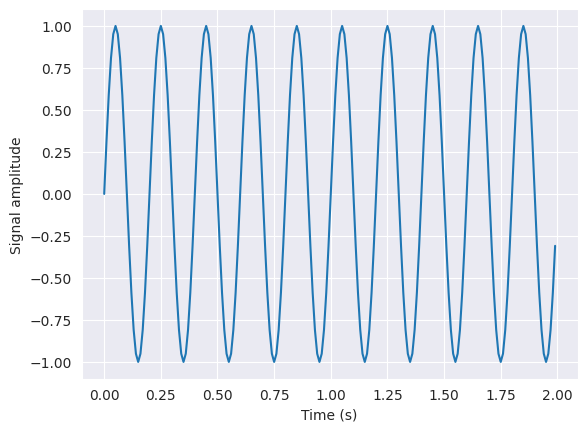

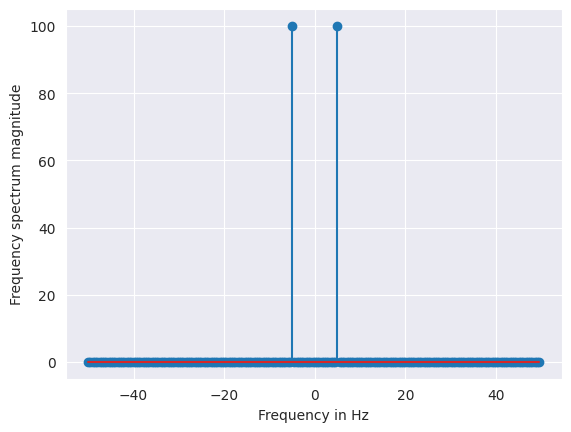

In [7]:
# Fast Fourier Transformation for converting spatial into frequency data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import fftpack

frequency = 5
sampling_rate = 100
time = np.linspace(0, 2, 2 * sampling_rate, endpoint=False)
signal = np.sin(frequency * 2 * np.pi * time)

plt.plot(time, signal)
plt.xlabel("Time (s)")
plt.ylabel("Signal amplitude")
plt.show()

frequency_spectrum = fftpack.fft(signal)
frequency = fftpack.fftfreq(len(signal)) * sampling_rate
plt.stem(frequency, np.abs(frequency_spectrum))
plt.xlabel("Frequency in Hz")
plt.ylabel("Frequency spectrum magnitude")
plt.show()